# German Corpora Analysis

By:


*   Alif Muhammad bin Effendi - 22106588
*   Nandar Lamin Aye - 22206714


Used open source links :


*   German Corpora Source (Category : News, Year : 2023)  : https://wortschatz.uni-leipzig.de/en/download/German
*   German Stop words : https://countwordsfree.com/stopwords/german
*   German Words list : https://github.com/hermitdave/FrequencyWords/tree/master








###  NLTK Installation

NLTK is installed as usual as a package with `pip`.

~~~~
# from the command line execute
pip install nltk
~~~~

Since it consists of a lot of files, NLTK has an own download mechanism for managing them. The following command opens a graphical user interface to manage them.

~~~~
# in Python runtime execute
>>> import nltk
>>> nltk.download()
~~~~

### Reading data file

In [23]:
FILE = './data_without_index_1M.txt'
f = open(FILE, encoding='utf-8', mode='r')
data   = f.read()

### Data Pre-processing

In [24]:
import re

def remove_special_chars(text):
  return re.sub(r"[^\w\s]", "", text)

cleaned_text = remove_special_chars(data.strip())

In [25]:
from nltk import *

WORDS = word_tokenize(cleaned_text)

# Lowercase all words of list
WORDS = [word.lower() for word in WORDS]

# Remove numbers
wordfilter = filter(lambda w: not w.isnumeric(), WORDS)
WORDS = list(wordfilter)
print(WORDS[:10000])

['grad', 'mehr', 'als', 'je', 'gemessenwie', 'warm', 'können', 'unsere', 'meere', 'noch', 'werden', 'cetcest', 'veröffentlichung', 'einer', 'corporate', 'newsfinanznachricht', 'übermittelt', 'durch', 'eqs', 'group', 'ag', 'und', 'nacht', 'zoom', 'gehört', 'zu', 'dehms', 'bekanntesten', 'songs', 'zusammen', 'mit', 'was', 'wollen', 'wir', 'trinken', 'gesungen', 'von', 'den', 'bots', 'und', 'now', 'that', 'youre', 'gone', 'gesungen', 'von', 'joe', 'cocker', 'bis', 'würden', 'erwartet', 'hieß', 'es', 'aus', 'der', 'landespartei', 'currentzis', 'gegensatz', 'trotzdem', 'kontrovers', 'legende', 'so', 'kurz', 'charakterisiert', 'kulturjournalist', 'dávid', 'gajdos', 'den', 'dirigenten', 'michail', 'pletnjow', 'in', 'seinem', 'text', 'im', 'onlinemagazin', 'bohema', 'prozent', 'recycelbar', 'geht', 'das', 'überhaupt', 'das', 'dritte', 'keplersche', 'gesetz', 'in', 'welchem', 'er', 'das', 'verhältnis', 'zwischen', 'umlaufzeiten', 'und', 'entfernungen', 'zweier', 'planeten', 'zueinander', 'regel

### Number 4 : Calculate the lexical richness of the selected corpus

In [26]:
def lexical_diversity(text):
    return len(set(text))/len(text)

richness = lexical_diversity(cleaned_text)
print(f'Lexical Richness of the corpus : {richness}')

Lexical Richness of the corpus : 1.5516920160030475e-05


### Number 5 : Plot the character distribution of your selected corpus.


[('e', 1295014), ('n', 791255), ('i', 613567), ('r', 604943), ('a', 556163), ('s', 509360), ('t', 504807), ('d', 374620), ('h', 339315), ('u', 321814), ('l', 312042), ('g', 245054), ('m', 231964), ('c', 224588), ('o', 212500), ('b', 171315), ('f', 151619), ('k', 120631), ('w', 115778), ('z', 93759), ('p', 82142), ('v', 70744), ('ü', 49589), ('ä', 43608), ('ö', 21731)]


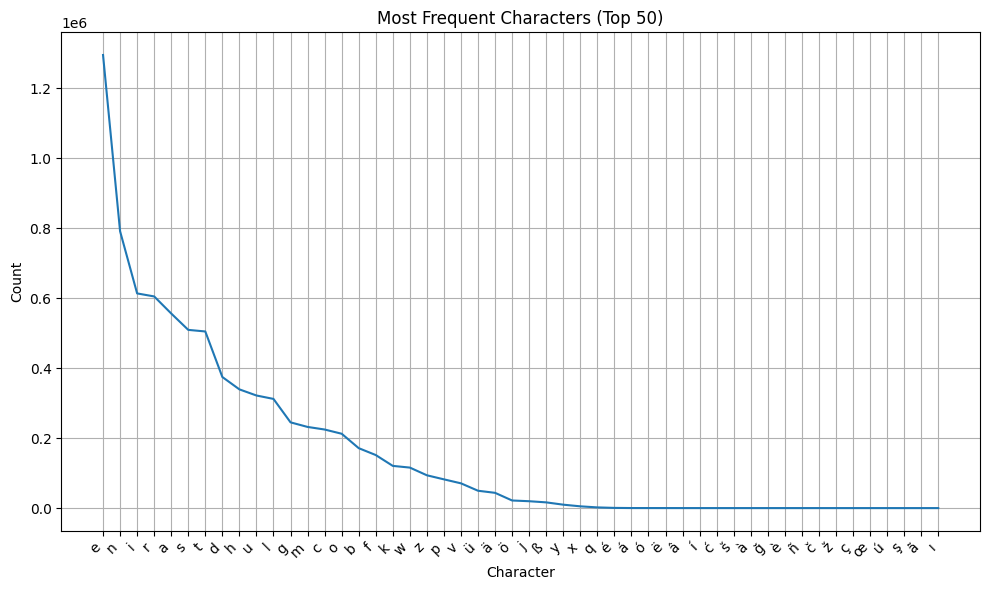

In [27]:
import nltk
import matplotlib
import matplotlib.pyplot as plt

fdist = nltk.FreqDist(ch.lower() for ch in cleaned_text if ch.isalpha())
print(fdist.most_common(25))

most_common = fdist.most_common(50)
characters, counts = zip(*most_common)

plt.figure(figsize=(10, 6))
plt.plot(characters, counts, linestyle='-')
plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Most Frequent Characters (Top 50)")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

### Number 6 : Plot the word distribution of the 20 most often used words of your selected corpus (with stopwords).


[('der', 45979), ('die', 43293), ('und', 29639), ('in', 25186), ('auch', 23336), ('auf', 18660), ('am', 17809), ('den', 15223), ('das', 13844), ('mit', 12813), ('zu', 12540), ('von', 12107), ('es', 12056), ('als', 11972), ('im', 11612), ('aber', 11006), ('sich', 10283), ('ist', 10179), ('ein', 10121), ('für', 9947)]


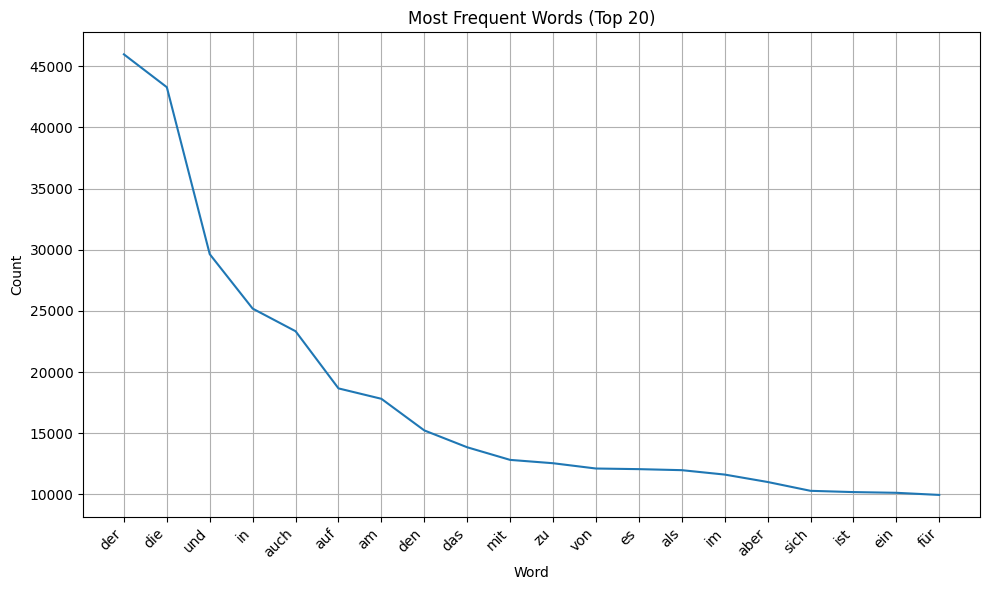

In [28]:
wordsfd = FreqDist(WORDS)
print(wordsfd.most_common(20))

most_common = wordsfd.most_common(20)
words, counts = zip(*most_common)

plt.figure(figsize=(10, 6))
plt.plot(words, counts, linestyle='-')
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most Frequent Words (Top 20)")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

### Number 7 : Plot the dispersion plot of the 5 most often used words



Most common 5 words : ['der', 'die', 'und', 'in', 'auch']


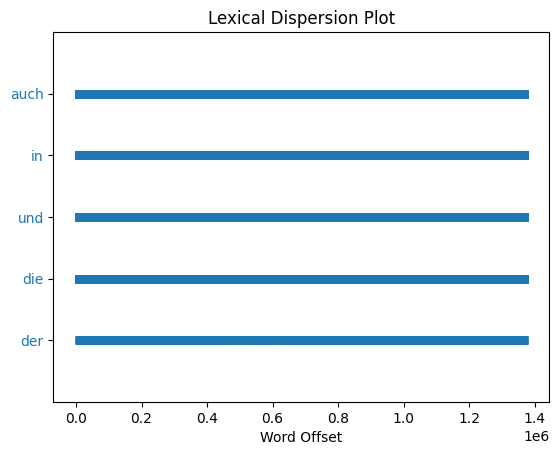

In [29]:
top_words = []

common_5 = wordsfd.most_common(5)

for word, word_counts in common_5:
  top_words.append(word)

print(f'Most common 5 words : {top_words}')

text2 = Text( WORDS )
plot = text2.dispersion_plot( top_words )

### Number 8 : Find the longest word in the text

Since the NLTK library does not include a built-in German word list, we used the external German word list from the Github.
https://github.com/hermitdave/FrequencyWords/tree/master


We can get the list of the built-in word list of NLTK :

```
from nltk.corpus import words

print(words.fileids()) // ['en', 'en-basic']
```

In [30]:
word_lengths = [ (len(w), w) for w in WORDS ]
word_lengths_sorted = sorted(word_lengths, key=lambda x: -len(x[1]))
most_longest = word_lengths_sorted[0]
print(f'The most longest word in text : {most_longest}')

The most longest word in text : (57, 'kreditinstituteimmobilienfinanzierungsmaßnahmenverordnung')


In [31]:
# Load German words from file and convert to a set of lowercase words
with open('./words_only.txt', 'r', encoding='utf-8') as file:
    german_words = set(word.lower() for word in file.read().split())

# Define the longest word
longest_word = 'KreditinstituteImmobilienfinanzierungsmaßnahmenVerordnung'

# Revised word break function using dynamic programming
def word_break(s, word_dict):
    s = s.lower()  # Convert the input string to lowercase
    dp = [None] * (len(s) + 1)
    dp[0] = []

    for i in range(1, len(s) + 1):
        for j in range(i):
            if dp[j] is not None and s[j:i] in word_dict:
                dp[i] = dp[j] + [s[j:i]]
                break

    return dp[-1]

# Split the longest word into subwords
split_subwords = word_break(longest_word, german_words)

# Print the subwords
print(f'The longest word "{longest_word}" is split into subwords: {split_subwords}')

The longest word "KreditinstituteImmobilienfinanzierungsmaßnahmenVerordnung" is split into subwords: ['kredit', 'institute', 'immobilien', 'finanzierungs', 'maßnahmen', 'verordnung']


### Number 9 : Find a short sentence with 5 words (plus/minus 1)

There are a lot of short sentences.

But we chose the "Ab April sind die Boxen erhältlich"

as our sample sentence for context-free grammar


In [32]:
# Finding short sentence function
def find_short_sentences(text):
    sentences = text.splitlines()
    short_sentences = []

    for sentence in sentences:
        words = sentence.split()
        word_count = len(words)

        if 4 <= word_count <= 6:  # Check if word count is within the desired range
            short_sentences.append(sentence)

    return short_sentences

short_sentence = find_short_sentences(cleaned_text)
print(f'Short sentence : {short_sentence}')

Short sentence : ['100 Prozent recycelbar  geht das überhaupt', '15 Millionen Vermögen wäre notwendig', '2019 wurde die SPD eigentlich abmoderiert', '20 ist ein gefährliches Ergebnis', '47 Tage ohne meine Kinder', '80 Prozent der Projekte sind gefährdet', '99  Einer schlägt sie alle', 'A3  AltdorfBurgthann  Wer hat Recht', 'A3Baustelle Hamminkeln Endlich Schluss mit Staus', 'Aankomende toestellen werden omgeleid naar Hannover', 'Aaron TaylorJohnson spielt das genaue Gegenteil', 'Ab 17 Uhr ist Eisstockschießen möglich', 'Ab 1861 wurde Kohle gefördert', 'Ab 18 Uhr beginnt die Preisverleihung', 'Ab 1930 Uhr ist vor Ort', 'Ab 19 Uhr sind Hartman dran', 'Ab 1 September ist Mandatskauf strafbar', 'Ab 2024 sind drei gestattet', 'Ab 2024 soll die Neuerung greifen', 'Ab 3 Mai wird aufgebaut', 'Ab 47 Dollar sind Sie dabei', 'Ab 7 Dezember im Kino', 'Ab April sind die Boxen erhältlich', 'Ab August sollen sie stehen', 'Ab Bahnübergängen werden präventiv Batterien ersetzt', 'Ab Baku zwei Qualifying

In [33]:
# Number 9 : Create a context-free grammar for the sentence. The grammar shall show the syntactical structure of the sentence, so the terminal symbols shall be words.

import nltk
from nltk import CFG

chosen_sentence = "Ab April sind die Boxen erhältlich"

# Define the grammar
german_grammar = CFG.fromstring("""
    S -> PP VP
    PP -> P NP
    VP -> V NP Adj | V Adj

    NP -> N | Det N

    P -> 'Ab'
    V -> 'sind'
    Det -> 'die'
    N -> 'April' | 'Boxen'
    Adj -> 'erhältlich'
""")


sentence = chosen_sentence.split()

parser = nltk.ChartParser(german_grammar)
trees = list(parser.parse(sentence))

# Display the parse tree
for tree in trees:
    tree.pretty_print()


print(trees)


               S                           
      _________|____                        
     PP             VP                     
  ___|____      ____|________________       
 |        NP   |        NP           |     
 |        |    |     ___|____        |      
 P        N    V   Det       N      Adj    
 |        |    |    |        |       |      
 Ab     April sind die     Boxen erhältlich

[Tree('S', [Tree('PP', [Tree('P', ['Ab']), Tree('NP', [Tree('N', ['April'])])]), Tree('VP', [Tree('V', ['sind']), Tree('NP', [Tree('Det', ['die']), Tree('N', ['Boxen'])]), Tree('Adj', ['erhältlich'])])])]


### Number 10 : Select a suitable stemmer and stem every word in the sentence found with part 9.


In [34]:
from nltk.stem.snowball import GermanStemmer

chosen_sentence = "Ab April sind die Boxen erhältlich"

word_tokens = word_tokenize(chosen_sentence)
word_tokens = [word.lower() for word in word_tokens]

snowball = SnowballStemmer("german")

snowball_stems = [snowball.stem(word) for word in word_tokens]
print(' '.join(snowball_stems))

ab april sind die box erhalt


### Number 11 : Find a lemmatizer for the language and lemmatize every word in the sentence.

### commands to install spacy and load model

- pip install spacy

- python -m spacy download de_core_news_sm

In [35]:
import spacy

# Load the German language model
nlp = spacy.load("de_core_news_sm")

sentence = "Ab April sind die Boxen erhältlich"

doc = nlp(sentence)
lemmas = [token.lemma_ for token in doc]

print("Lemmas:", lemmas)

Lemmas: ['ab', 'April', 'sein', 'der', 'Box', 'erhältlich']


### Number 12 : Remove stopwords and repeat exercises 6+7 (word distribution and dispersion plot)


Additional stop words are from - https://countwordsfree.com/stopwords/german

In [46]:
from nltk.corpus import stopwords

# use stopwords from NLTK
default_stopwords = set(stopwords.words('german'))

stopwords_file = './stop_words_german.txt'
with open(stopwords_file, 'r', encoding='utf-8') as f:
    custom_stopwords = set(f.read().splitlines())   


# bundle both sources for all_stopwords
all_stopwords = default_stopwords | custom_stopwords

print(all_stopwords)

filtered_words = [w for w in WORDS if not w in all_stopwords]

{'kommen', 'mögen', 'soll', 'gewollt', 'willst', 'müßt', 'wollte', 'mag', 'lieber', 'uhr', 'durch', 'eures', 'zweiten', 'wurde', 'mancher', 'eben', 'unserem', 'rechte', 'z.b', 'nein', 'allein', 'kam', 'ihn', 'jedes', 'manchen', 'derselbe', 'einmal', 'würden', 'rechtes', 'seinen', 'jedermanns', 'natürlich', 'sechster', 'eigen', 'zwanzig', 'ei', 'dies', 'unserer', 'infolgedessen', 'wer', 'ebenso', 'sache', 'uns', 'niemandem', 'wäre', 'welcher', 'mussten', 'vor', 'sa', 'sonst', 'Ordnung', 'derer', 'kannst', 'einer', 'manches', 'drittes', 'einem', 'die', 'weil', 'ihren', 'habe', 'einigen', 'jemand', 't', 'einige', 'dahinter', 'ist', 'gar', 'ab', 'vielen', 'f', 'bin', 'ob', 'ehrlich', 'ander', 'recht', 'derjenige', 'k', 'gute', 'rechter', 'dafür', 'weiteren', 'viel', 'das', 'dazwischen', 'dort', 'mochten', 'bist', 'daran', 'wohin', 'zehnten', 'p', 'morgen', 'auch', 'hinter', 'h', 'ganzen', 'drin', 'eigene', 'guter', 'oft', 'mich', 'schlecht', 'danach', 'ich', 'ganzes', 'warum', 'achter', 'd

[('euro', 1362), ('prozent', 1356), ('aktuell', 1285), ('sonntag', 1215), ('aufgrund', 1202), ('samstag', 1200), ('freitag', 1106), ('mittwoch', 975), ('polizei', 928), ('steht', 911), ('dienstag', 907), ('mal', 887), ('donnerstag', 876), ('deutschland', 875), ('montag', 863), ('stadt', 806), ('anschließend', 778), ('laut', 763), ('sehen', 760), ('anfang', 758)]


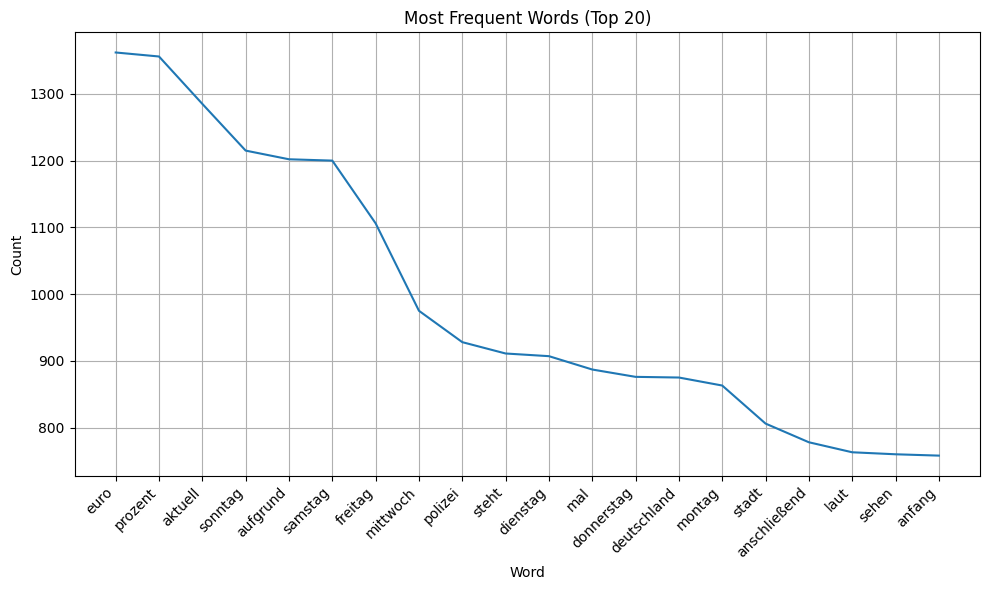

In [47]:
filtered_wordsfd = FreqDist(filtered_words)
print(filtered_wordsfd.most_common(20))

most_common = filtered_wordsfd.most_common(20)
words, counts = zip(*most_common)

plt.figure(figsize=(10, 6))
plt.plot(words, counts, linestyle='-')
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most Frequent Words (Top 20)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

['euro', 'prozent', 'aktuell', 'sonntag', 'aufgrund']


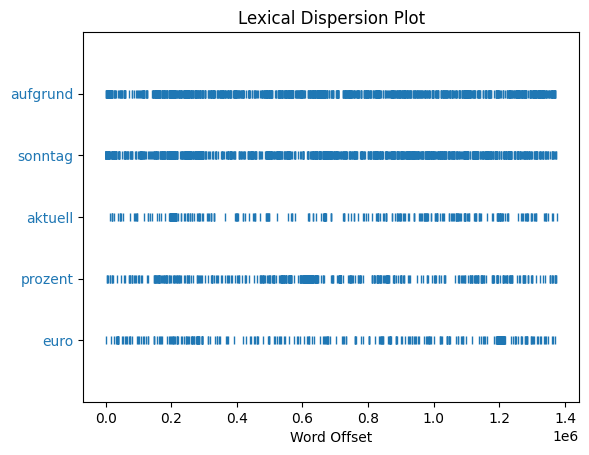

In [48]:
top_5_words = filtered_wordsfd.most_common(5)

top_words = []
for word, word_counts in top_5_words:
  top_words.append(word)

print(top_words)

text2 = Text( WORDS )
plot = text2.dispersion_plot( top_words )

### Number 13 : Print a wordcloud without your stopwords

To install the wordcloud :

*   pip install wordcloud matplotlib




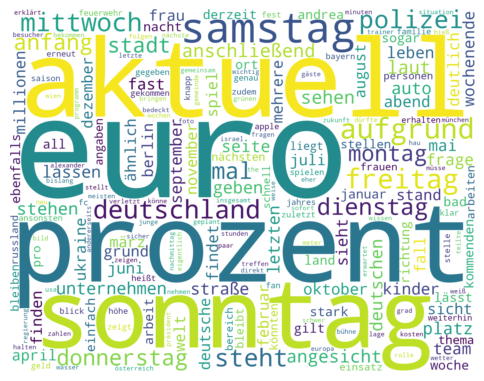

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


width = 6
height = 6
plt.figure(figsize=(width, height))
wordcloud = WordCloud(
    background_color="white",
    width=1800,
    height=1400,
    stopwords=all_stopwords,
    collocations=False  # Disable collocations for case-insensitive stopword removal
).generate(" ".join(filtered_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()